Bellabeat is a high-tech manufacturer of health-focused products for women. To unlock opportunities for the company to grow, usage data about one of the company's products is to be analyzed to determine how consumers are using their smart devices, and then give recommendations about what marketing strategy should be employed.

The data used is a Fitbit usage dataset generated via a survey run in spring of 2016, with the provided data spanning from April 12, 2016 to May 9, 2016. It is hosted on Kaggle.com by user arashnic under a CC0 public domain license. The dataset provides daily, hourly, and minute-wise logs of steps taken, distance covered, physical activity intensity, calories, weight, and sleep time.

One problem with the data is that it was collected six years ago, so it is not recent and may not reflect current consumers' usage habits. Another one is that the survey participants' demographics were not recorded, so it is unknown how many are women, the target consumer group, or whether all races and ethnicities are represented. Furthermore, the sample size is small, with about thirty participants total, and the survey time is brief, so it may not be representative of year-round smart device usage habits.

The files used from the dataset for this analysis will be the daily activity, sleep, and hourly intensity logs, which should give an idea of what consumers' current health needs are and how they use their smart devices.

# Introduction

Bellabeat is a high-tech manufacturer of health-focused products for women.

How are consumers using their smart devices, and how should this guide Bellabeat's marketing strategy?

The dataset provided is a Fitbit dataset generated via an Amazon Mechanical Turk survey between March 12, 2016 and May 12, 2016. The actual given data is from April 12, 2016 to May 9, 2016.

Some caveats of the dataset provided are that the participants' demographics are not recorded, so we cannot know if they are all women, the target consumer group, or whether they are representative of all ethnicities. Furthermore, the sample group is small and the survey time is short, so the data may not be indicative of year-round habits, and it was collected six years ago, so it may not reflect current consumers' usage habits.

First, let's decide what data we will need. The daily and hourly datasets should be enough to get a feel for the consumers' usage habits.

# Data Processing

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

activity = pd.read_csv('Fitabase_Data_4.12.16-5.12.16\dailyActivity_merged.csv')
sleep = pd.read_csv('Fitabase_Data_4.12.16-5.12.16\sleepDay_merged.csv')
intensity = pd.read_csv('Fitabase_Data_4.12.16-5.12.16\hourlyIntensities_merged.csv')

Now that the desired datasets are imported and converted to pandas dataframes, let's take a look at the information they contain.

In [18]:
activity.isna().sum()

sleep.isna().sum()

intensity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [19]:
activity.dropna(axis = 'index')
sleep.dropna(axis = 'index')
intensity.dropna(axis = 'index')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000
...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,12,0.200000
22095,8877689391,5/12/2016 11:00:00 AM,29,0.483333
22096,8877689391,5/12/2016 12:00:00 PM,93,1.550000
22097,8877689391,5/12/2016 1:00:00 PM,6,0.100000


In [20]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

It appears that the ActivityDate column is not in the correct format. Further investigation reveals that all the datasets suffer from the same problem, so let's convert their dates into the correct datetime format.

In [21]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
#sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
#intensity['ActivityHour'] = pd.to_datetime(intensity['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')

In [22]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


This dataset gives the time as well as the date. However, it appears all the times recorded are 12:00:00 AM, so they are most likely filler values and can be ignored.

Next, let's check the IDs of the participants. It appears all 33 unique IDs (participants) are the same in the activity, calories, and intensities datasets, but the sleep dataset only has 24 of these.

In [23]:
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
sleep['SleepDay'].head()

0   2016-04-12
1   2016-04-13
2   2016-04-15
3   2016-04-16
4   2016-04-17
Name: SleepDay, dtype: datetime64[ns]

In [24]:
intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [25]:
intensity['ActivityHour'] = pd.to_datetime(intensity['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')
intensity['ActivityHour'].tail()

22094   2016-05-12 10:00:00
22095   2016-05-12 11:00:00
22096   2016-05-12 12:00:00
22097   2016-05-12 13:00:00
22098   2016-05-12 14:00:00
Name: ActivityHour, dtype: datetime64[ns]

In [38]:
activity.duplicated().sum()
sleep.duplicated().sum()
intensity.duplicated().sum()

0

3

0

In [26]:
activity['Id'].nunique()

33

In [27]:
sleep['Id'].nunique()

24

In [28]:
intensity['Id'].nunique()

33

In [45]:
activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


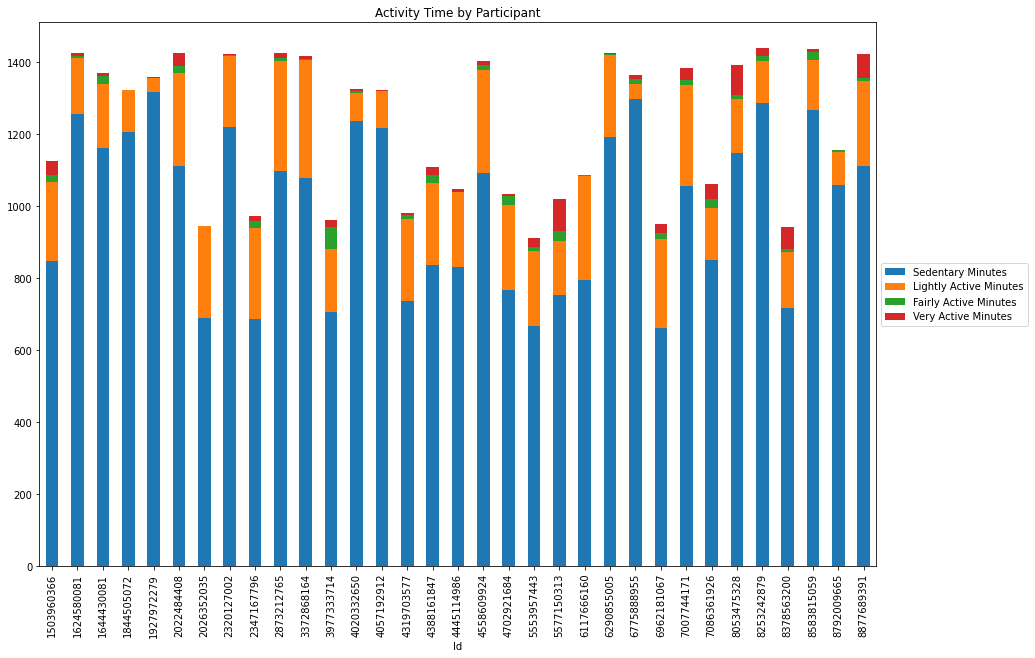

In [29]:
participant_activity = activity.groupby('Id')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean()
participant_activity.reset_index(inplace = True)

participant_activity.plot(x = 'Id', kind = 'bar', title = 'Activity Time by Participant', figsize = (15, 10), stacked = True).legend(labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes'], loc='center left', bbox_to_anchor=(1.0, 0.5))

[Text(0.5, 1.0, 'Activity Level Proportions'), Text(0, 0.5, 'Percentage')]

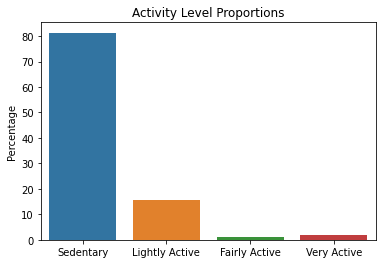

In [30]:
# Find proportion of levels of activity
very_active = activity['VeryActiveMinutes'].sum()
fairly_active = activity['FairlyActiveMinutes'].sum()
lightly_active = activity['LightlyActiveMinutes'].sum()
sedentary = activity['SedentaryMinutes'].sum()
total_activity = very_active + fairly_active + lightly_active + sedentary
activity_levels = [sedentary, lightly_active, fairly_active, very_active] / total_activity * 100

sns.barplot(x = ["Sedentary", "Lightly Active", "Fairly Active", "Very Active"], y = activity_levels).set(title = "Activity Level Proportions", ylabel = "Percentage")

[Text(0.5, 1.0, 'Proportion of Sleep Times'), Text(0, 0.5, 'Count')]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Extreme Undersleeper'),
  Text(1, 0, 'Undersleeper'),
  Text(2, 0, 'Healthy Sleeper'),
  Text(3, 0, 'Oversleeper')])

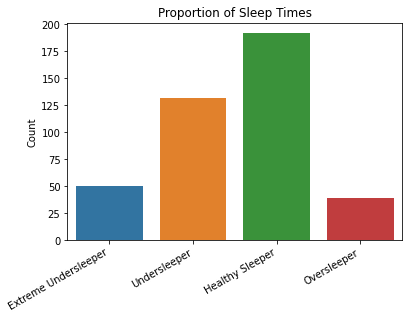

In [31]:
# The recommended amount of sleep is 7 to 9 hours, or 420 to 540 minutes
# Dataset: avg = 419.467312, min = 58, 25% = 361, 50% = 433, 75% = 490, max = 796 from sleep['TotalMinutesAsleep'].describe()
# Categories can be "extreme undersleeper" (58 to 300 non-inclusive), "undersleeper" (361 to 480 non-inclusive),
# "healthy sleeper" (480 to 600 inclusive), "oversleeper" (600 non-inclusive to 796)
sleep_level = [0, 0, 0, 0]
for i in range(0, len(sleep['TotalMinutesAsleep'])):
    sleep_time = sleep['TotalMinutesAsleep'].iloc[i]
    if sleep_time >= 420 and sleep_time <= 540:
        sleep_level[2] += 1
    elif sleep_time > 540:
        sleep_level[3] += 1
    elif sleep_time > 300:
        sleep_level[1] += 1
    else:
        sleep_level[0] += 1

sns.barplot(x = ["Extreme Undersleeper", "Undersleeper", "Healthy Sleeper", "Oversleeper"], y = [sleep_level[0], sleep_level[1], sleep_level[2], sleep_level[3]]).set(title = "Proportion of Sleep Times", ylabel = "Count")
plt.xticks(rotation = 30, ha = 'right')

In [32]:
# By user sleep time? From below, it seems some are severly undersleeping while others are oversleeping.

From the visualizations, it can be seen that the user base is overwhelmingly sedentary, but most get either a healthy amount of sleep or too little. Let's see if there's a way to improve that, and if there is a correlation between exercise and sleep quantity.

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:title={'center':'Total Minutes Asleep'}, xlabel='Id'>

<AxesSubplot:xlabel='Id'>

<AxesSubplot:xlabel='Id'>

Text(0.5, 1.0, 'Sleep by Intensity Compared with Total Intensity')

<Figure size 1080x720 with 0 Axes>

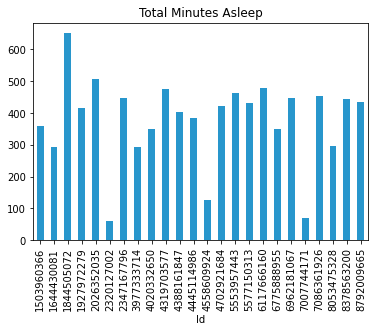

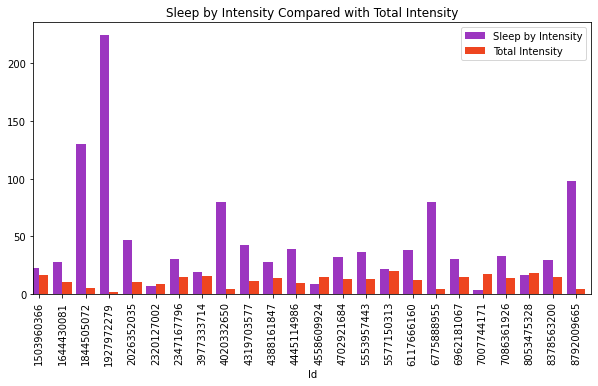

In [33]:
# Comparing sedentary time and sleep time

user_intensity_sleep = intensity.groupby('Id')[['TotalIntensity', 'AverageIntensity']].mean()
user_intensity_sleep['TotalMinutesAsleep'] = sleep.groupby('Id')['TotalMinutesAsleep'].mean()
user_intensity_sleep['SleepByIntensity'] = user_intensity_sleep['TotalMinutesAsleep'] / user_intensity_sleep['TotalIntensity']
user_intensity_sleep.dropna(axis = 'index', inplace = True)
user_intensity_sleep.reset_index(inplace = True)
# Total Intensity
#user_intensity_sleep.iloc[:, [0, 1]].plot.bar(x = 'Id', color = '#EE4520', legend = False, title = 'Total Intensity')
# Average Intensity
#user_intensity_sleep.iloc[:, [0, 2]].plot.bar(x = 'Id', position = 1, width = 0.4, color = '#9C36C0', ax = ax)
# Total Minutes Asleep
plt.figure(figsize = (15, 10))
user_intensity_sleep.plot.bar(x = 'Id', y = 'TotalMinutesAsleep', color = '#2896CC', legend = False, title = 'Total Minutes Asleep')
fig, ax = plt.subplots(figsize = (10, 5))
user_intensity_sleep.plot.bar(x = 'Id', y = 'SleepByIntensity', position = 1, width = 0.4, label = 'Sleep by Intensity', color = '#9C36C0', ax = ax)
user_intensity_sleep.plot.bar(x = 'Id', y = 'TotalIntensity', position = 0, width = 0.4, label = 'Total Intensity', color = '#EE4520', ax = ax)
plt.title('Sleep by Intensity Compared with Total Intensity')

#participant_activity_sleep = activity.groupby('Id')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean()
#participant_activity_sleep['TotalMinutesAsleep'] = sleep.groupby('Id')['TotalMinutesAsleep'].mean()
#participant_activity_sleep.dropna(axis = 'index', inplace = True)
#participant_activity_sleep.reset_index(inplace = True)
#fig, ax = plt.subplots(figsize = (20, 15))
#participant_activity_sleep.iloc[:,:-1].plot.bar(x = 'Id', stacked = True, position = 1, width = .4, color = ['#2896CC', '#2896CC', '#9C36C0', '#9C36C0'], ax = ax)
#participant_activity_sleep.iloc[:,[0, -1]].plot.bar(x = 'Id', position = 0,color = '#EE4520', width = .4, ax = ax)
#ax.set_xlim(-0.5, len(participant_activity_sleep) - 0.5)

#participant_activity_sleep.plot(x = 'Id', kind = 'bar', subplots = True, figsize = (20, 15), layout = (5, 1), legend = False, sharey = True)
#.legend(labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes', 'Sleep Time'], loc='center left', bbox_to_anchor=(1.0, 0.5))

It appears that the lower the total intensity of exercise, the greater the total time slept.

Note: It is acceptable to view the data by participant because the sample size is small. This also makes outliers obvious, such as participant 2320127002 who slept less than 100 minutes on average, and whose data could be ignored.

<Figure size 1080x720 with 0 Axes>

[Text(0.5, 1.0, 'Calories Burned vs Total Steps'),
 Text(0.5, 0, 'Total Steps'),
 Text(0, 0.5, 'Calories')]

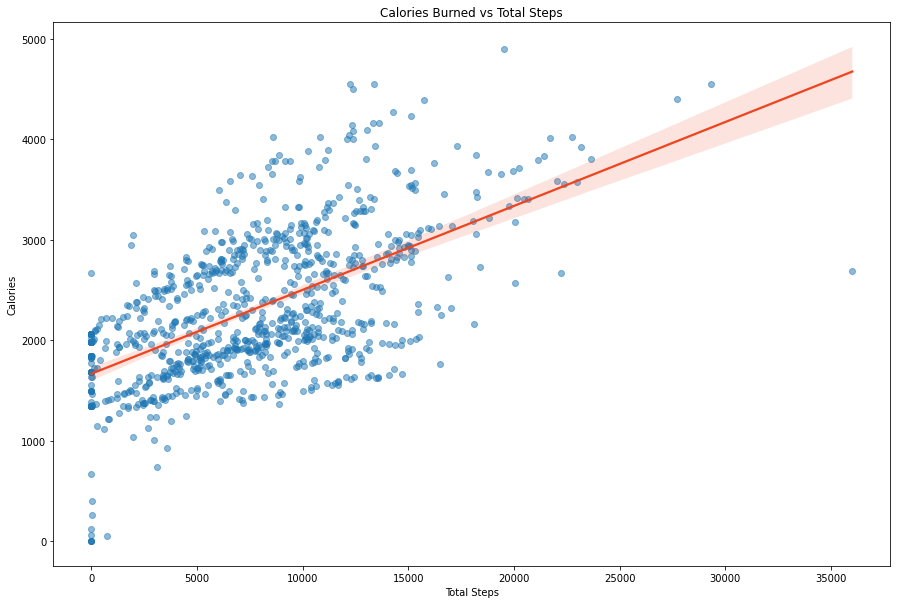

In [34]:
# Let's graph (activites) distance vs total steps (scatter plot) with a trendline
plt.figure(figsize = (15, 10))
sns.regplot(x = activity['TotalSteps'], y = activity['Calories'], scatter_kws = {'alpha' : 0.5}, line_kws = {'color' : '#EE4520'}).set(title = "Calories Burned vs Total Steps", xlabel = "Total Steps", ylabel = "Calories")

The participants spend nearly 80% of their time sedentary and mostly slept enough.
It appears that more and heavier exercise is associated with shorter sleep time, which is most likely because people who exercise more will want to maximize their time awake.
The number of calories burned is proportional to the distance exercised, so increasing exercise would be a good way for users to manage their weight.

# Takeaways

Here are several features Bellabeat should implement:
Participants spend the overwhelming majority of their time sedentary, so Bellabeat should remind and encourage them to get active when they have time (which the user may specify, depending on their schedule).
Some participants also tend to get less than the recommended amount of sleep, so Bellabeat should help them set bedtimes and remind them about them.
Logging activity and giving estimated calories burned depending on distance exercised and demographics would be helpful for users who want to manage their weight.